Paquetes necesarios

In [19]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [20]:
#Dimensiones de la imagen a crear
ancho = 300
alto = 200

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

Imagen en color

(800, 800, 3)


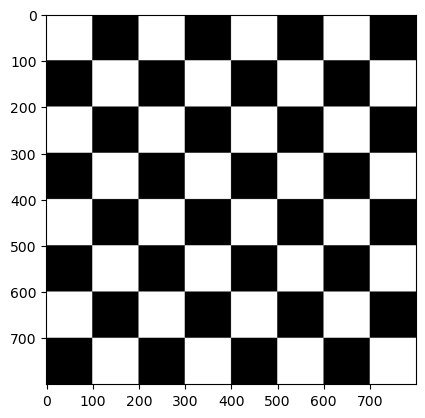

In [21]:
#Crea una imagen con tres planos
color_img = np.zeros((800,800,3), dtype = np.uint8)
x = 0
y = 0
fila_par = True
while x < 800 or y < 800:
    color_img[y:y+100,x:x+100,:] = 255
    if x >= 750:
        y += 100
        if fila_par:
            x=100
            fila_par = False
        else:
            x = 0
            fila_par = True
    elif y ==800:
        break 
    else:
        x+= 200
    
#print(color_img)
#Dimensiones
print(color_img.shape)
#Visualiza con matplotlib (sin especificar el mapa de color gris)
plt.imshow(color_img) 
plt.show()


TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

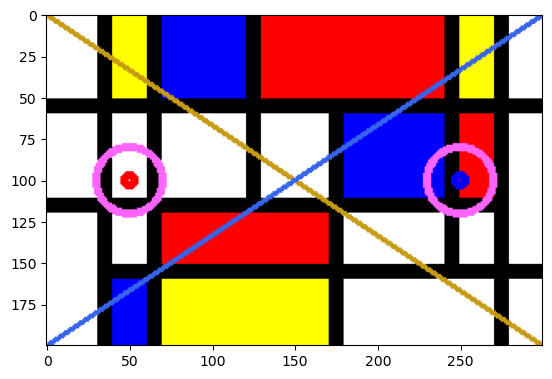

True

In [22]:
#Crea una imagen con tres planos
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

#Línea roja vertical de grosor 3
#linea 1
cv2.rectangle(color_img,(0,0),(30,50),(255,255,255),-1)
cv2.rectangle(color_img,(40,0),(60,50),(255,255,0),-1)
cv2.rectangle(color_img,(70,0),(120,50),(0,0,255),-1)
cv2.rectangle(color_img,(130,0),(240,50),(255,0,0),-1)
cv2.rectangle(color_img,(250,0),(270,50),(255,255,0),-1)
cv2.rectangle(color_img,(280,0),(300,50),(255,255,255),-1)
#linea 2
cv2.rectangle(color_img,(0,60),(30,110),(255,255,255),-1)
cv2.rectangle(color_img,(40,60),(60,110),(255,255,255),-1)
cv2.rectangle(color_img,(70,60),(120,110),(255,255,255),-1)
cv2.rectangle(color_img,(130,60),(170,110),(255,255,255),-1)
cv2.rectangle(color_img,(180,60),(240,110),(0,0,255),-1)
cv2.rectangle(color_img,(250,60),(270,110),(255,0,0),-1)
cv2.rectangle(color_img,(280,60),(300,150),(255,255,255),-1)

#línea 3
cv2.rectangle(color_img,(0,120),(30,200),(255,255,255),-1)
cv2.rectangle(color_img,(40,120),(60,150),(255,255,255),-1)
cv2.rectangle(color_img,(70,120),(170,150),(255,0,0),-1)
cv2.rectangle(color_img,(180,120),(240,150),(255,255,255),-1)
cv2.rectangle(color_img,(250,120),(270,150),(255,255,255),-1)

#línea 4
cv2.rectangle(color_img,(40,160),(60,200),(0,0,255),-1)
cv2.rectangle(color_img,(70,160),(170,200),(255,255,0),-1)
cv2.rectangle(color_img,(180,160),(270,200),(255,255,255),-1)
cv2.rectangle(color_img,(280,160),(300,200),(255,255,255),-1)

#extras
cv2.line(color_img,(0,0),(300,200),(200,155,21),2)
cv2.line(color_img,(0,200),(300,0),(55,100,234),2)

cv2.circle(color_img,(50,100),20,(255,100,255),3)
cv2.circle(color_img,(50,100),3,(255,0,0),3)

cv2.circle(color_img,(250,100),20,(255,100,255),3)
cv2.circle(color_img,(250,100),3,(0,0,255),3)


#Visualiza sin especificar el mapa de color gris
plt.imshow(color_img) 
plt.show()

#Salva la imagen resultante a disco
cv2.imwrite('imagen.jpg', color_img)

TAREA: Modifica de forma libre los valores de un plano de la imagen

Evento de ratón para mostrar el valor RGB del píxel

In [23]:
# Función que trata eventos de ratón 
def mouse_events(event, x, y, flags, params):
    global px, py, R, G, B
    px = -1
    # Movimiento del puntero     
    if event==cv2.EVENT_MOUSEMOVE:
        #Valores del píxel, desde la webcam no es BGR
        B = frame[y, x, 0]
        G = frame[y, x, 1]
        R = frame[y, x, 2]  
        # Almacena valores del evento
        px = x
        py = y

     
  

In [ ]:
vid = cv2.VideoCapture(0)

# Tipografía para mostrar texto
font = cv2.FONT_HERSHEY_SIMPLEX
  
lanzado = 0 #bandera para primer fotograma
px = -1
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()
    #Apagamos el color Azul
    frame[:,:,0:1] = 0
    frame 
    if ret: 
        # Activa el manejador en el primer fotograma
        if lanzado == 0:
            # Muestra fotograma
            cv2.imshow('Cam', frame)   
            # Define el nombre del manejador del evento
            cv2.setMouseCallback('Cam', mouse_events)
            lanzado = 1
            
        # Muestra valores RGB intentando centrar en el puntero
        if px > -1:
            cv2.putText(frame, '{}'.format(R), (px-45,py-5), font, 0.5, (0, 0, 255), 1)
            cv2.putText(frame, '     {}'.format(G), (px-54,py-5), font, 0.5, (0, 255, 0), 1)
            cv2.putText(frame, '         {}'.format(B), (px-54,py-5), font, 0.5, (255, 0, 0), 1)
            
        cv2.imshow('Cam', frame)   
        
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

Pop art
Salida de la webcam "inspirada" en Andy Warhol (Marilyn, https://temasycomentariosartepaeg.blogspot.com/p/autor-andy-warhol-1928-1987-titulo.html)

In [29]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*2,w*2,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tr = collage[0:h,w:w+w]
bl = collage[h:h+h,0:w]
br = collage[h:h+h,w:w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()


    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos con los valores de los planos
        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r

        tr[:,:,0] = 255 - r
        tr[:,:,1] = g
        tr[:,:,2] = b
        
        bl[:,:,0] = r
        bl[:,:,1] = 255 - b
        bl[:,:,2] = g

        br[:,:,0] = b
        br[:,:,1] = g
        br[:,:,2] = 255 - r
    
        #Convertimos a escala de grises para encontrar los pixeles mas claros y oscuros
        gray = cv2.cvtColor(collage, cv2.COLOR_BGR2GRAY)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray)

        #Dibujamos los circulos
        cv2.circle(collage, min_loc, 10, (0, 0, 255), 2)
        cv2.circle(collage, max_loc, 10, (0, 255, 0), 2)
        # Muestra composición
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [33]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/2)
h=int(h/2)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 2x original
collage = np.zeros((h*3,w*3,3), dtype = np.uint8)
tl = collage[0:h,0:w]
tc = collage[0:h,w:w*2]
tr = collage[0:h,w*2:w*3]
cl = collage[h:h*2,0:w]
cc = collage[h:h*2,w:w*2]
cr = collage[h:h*2,w*2:w*3]
bl = collage[h*2:h*3,0:w]
bc = collage[h*2:h*3,w:w*2]
br = collage[h*2:h*3,w*2:w*3]


while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()


    #Menor tamaño
    frame = cv2.resize(frameIN, (int(w),int(h)),cv2.INTER_NEAREST)

    if ret:
        
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos con los valores de los planos
        tl[:,:,0] =0
        tl[:,:,1] =0
        tl[:,:,2] =r

        tc[:,:,0] =0
        tc[:,:,1] =g
        tc[:,:,2] =0

        tr[:,:,0] =b
        tr[:,:,1] =0
        tr[:,:,2] =0

        cl[:,:,0] = 255-r
        cl[:,:,1] = 255-r
        cl[:,:,2] = 255-r

        cc[:,:,0] = 255-g
        cc[:,:,1] = 255-g
        cc[:,:,2] = 255-g

        cr[:,:,0] = 255-b
        cr[:,:,1] = 255-b
        cr[:,:,2] = 255-b

        bl[:,:,0] = 0+r
        bl[:,:,1] = 0+r
        bl[:,:,2] = 0+r

        bc[:,:,0] = 0+g
        bc[:,:,1] = 0+g
        bc[:,:,2] = 0+g

        br[:,:,0] = 0+b
        br[:,:,1] = 0+b
        br[:,:,2] = 0+b
    


        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()